<a href="https://colab.research.google.com/github/Ilektra-Giassa/Tutorials/blob/main/reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exclusive news on 46 topics!

In [64]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
#loading the 10K most frequent words
#8982 for train, 2246 for test dataset

In [65]:
max(train_labels)-min(train_labels)
#46 newswire topics

45

### Decode the newswires

In [66]:
word_index=reuters.get_word_index()
reverse_word_index=dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire=' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
#indices 0, 1, 2 for padding, start of sequence, and unknown

### Vectorize the data

In [67]:
import numpy as np
def vectorize(sequences, dimension=10000):
  results=np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence]=1.
  return results

x_train=vectorize(train_data)
x_test=vectorize(test_data)

### OHE of labels

In [68]:
def ohe(labels, dimension=64):
  results=np.zeros((len(labels), dimension))
  for i, labels in enumerate(labels):
    results[i, labels]=1.
  return results

ohe_train_labels=ohe(train_labels)
ohe_test_labels=ohe(test_labels)

### Build the net

In [99]:
from keras import models, layers
model=models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(64, activation='softmax'))

### Compile model

In [100]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### Validation dataset

In [101]:
x_val=x_train[:1000]
y_val=ohe_train_labels[:1000]
x_partial_train=x_train[1000:]
y_partial_train=ohe_train_labels[1000:]

In [102]:
history=model.fit(x_partial_train,
                  y_partial_train, 
                  epochs=20, 
                  batch_size=512, 
                  validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 2s 74ms/step - loss: 2.9169 - accuracy: 0.5147 - val_loss: 1.9032 - val_accuracy: 0.6280
Epoch 2/20
16/16 [==============================] - 1s 51ms/step - loss: 1.5263 - accuracy: 0.6933 - val_loss: 1.3755 - val_accuracy: 0.7020
Epoch 3/20
16/16 [==============================] - 1s 51ms/step - loss: 1.1175 - accuracy: 0.7621 - val_loss: 1.1893 - val_accuracy: 0.7490
Epoch 4/20
16/16 [==============================] - 1s 52ms/step - loss: 0.8947 - accuracy: 0.8108 - val_loss: 1.0742 - val_accuracy: 0.7760
Epoch 5/20
16/16 [==============================] - 1s 50ms/step - loss: 0.7218 - accuracy: 0.8527 - val_loss: 1.0134 - val_accuracy: 0.7980
Epoch 6/20
16/16 [==============================] - 1s 49ms/step - loss: 0.5865 - accuracy: 0.8809 - val_loss: 0.9644 - val_accuracy: 0.7990
Epoch 7/20
16/16 [==============================] - 1s 50ms/step - loss: 0.4759 - accuracy: 0.9024 - val_loss: 0.9300 - val_accuracy: 0.8090
Epoch 8/20
16

In [112]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plot loss and accuracy

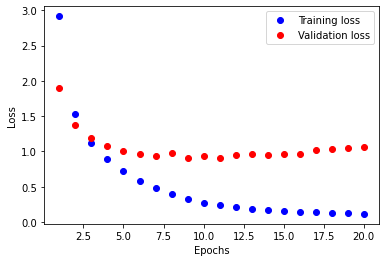

In [105]:
import matplotlib.pyplot as plt
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1, 21)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'ro', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

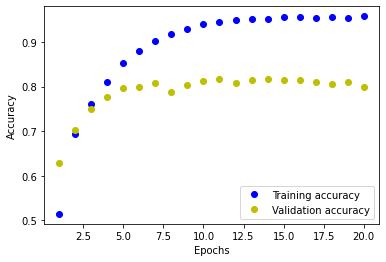

In [114]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'yo', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Retrain the model with 9 epochs; any more and it overfits

In [115]:
model.fit(x_partial_train,
          y_partial_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))

Epoch 1/9
16/16 [==============================] - 2s 121ms/step - loss: 0.1145 - accuracy: 0.9559 - val_loss: 1.0477 - val_accuracy: 0.8090
Epoch 2/9
16/16 [==============================] - 1s 63ms/step - loss: 0.1078 - accuracy: 0.9573 - val_loss: 1.1514 - val_accuracy: 0.8050
Epoch 3/9
16/16 [==============================] - 1s 66ms/step - loss: 0.1053 - accuracy: 0.9595 - val_loss: 1.1400 - val_accuracy: 0.7940
Epoch 4/9
16/16 [==============================] - 1s 60ms/step - loss: 0.1039 - accuracy: 0.9589 - val_loss: 1.0898 - val_accuracy: 0.8060
Epoch 5/9
16/16 [==============================] - 1s 71ms/step - loss: 0.1033 - accuracy: 0.9574 - val_loss: 1.0958 - val_accuracy: 0.8120
Epoch 6/9
16/16 [==============================] - 2s 95ms/step - loss: 0.1030 - accuracy: 0.9572 - val_loss: 1.1901 - val_accuracy: 0.7910
Epoch 7/9
16/16 [==============================] - 1s 64ms/step - loss: 0.1013 - accuracy: 0.9599 - val_loss: 1.1840 - val_accuracy: 0.8000
Epoch 8/9
16/16 [==

### Evaluate on the test set

In [117]:
results=model.evaluate(x_test, ohe_test_labels)
results

71/71 [==============================] - 0s 4ms/step - loss: 1.3419 - accuracy: 0.7872


[1.3418771028518677, 0.7871772050857544]